In [55]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

from src.cpoints import get_cpoints
from src.io import *
from src.plot import *
from src.utils import *

In [56]:
device = get_device()

Device: cuda


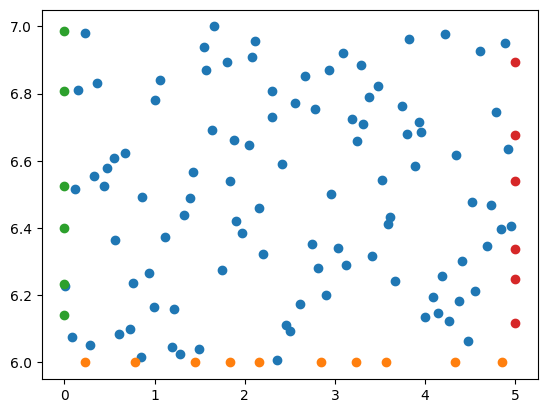

In [57]:
c = get_cpoints("latin")
c_points = c(1,1,100, 10, 6, (0,5), (6,7), torch.device("cpu"))
figure, ax = plt.subplots()
x, t = c_points.residual()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.init()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.boundary_left()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.boundary_right()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())

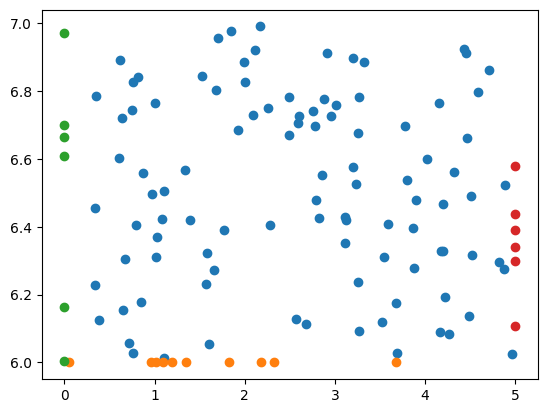

In [58]:
c = get_cpoints("rand")
c_points = c(1,1,100, 10, 6, (0,5), (6,7), torch.device("cpu"))
figure, ax = plt.subplots()
x, t = c_points.residual()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.init()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.boundary_left()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())
x, t = c_points.boundary_right()
ax.scatter(x.detach().flatten().numpy(), t.detach().flatten().numpy())

In [69]:
c = get_cpoints("latin")
c_points = c(10,10,100, 10, 6, (0,5), (6,7), torch.device("cpu"))
x, t = c_points.residual()

In [72]:
df = pd.read_csv("results/problems.csv")
df

,length,total_time,n_points_x,n_points_t,n_points_rand,n_points_init,n_points_boundary,weight_residual,weight_initial,weight_boundary,...,hard_constraint,exact,collocation_points,tag,loss,loss_residual,loss_initial,loss_boundary,l2_error,l2_error_init
0,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c03_A05_phi2,0.000025,0.000003,0.000010,1.197193e-05,tensor(0.3509),tensor(0.0352)
1,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c03_A05_phi4,0.000024,0.000009,0.000013,2.076574e-06,tensor(0.6155),tensor(0.0532)
2,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c03_A05_phi6,0.000129,0.000084,0.000030,1.457825e-05,tensor(0.7251),tensor(0.0696)
3,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c03_A1_phi2,0.000006,0.000004,0.000002,5.830058e-07,tensor(0.1544),tensor(0.0127)
4,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c03_A1_phi4,0.000360,0.000094,0.000126,1.407085e-04,tensor(2.9655),tensor(0.1871)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,neu_c3_A1_phi4,0.438194,0.002650,0.387558,4.798743e-02,tensor(138.3663),tensor(10.7583)
86,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,neu_c3_A1_phi6,0.487764,0.000194,0.473596,1.397353e-02,tensor(148.9472),tensor(11.9005)
87,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,neu_c3_A2_phi2,0.224850,0.014681,0.168253,4.191675e-02,tensor(101.0817),tensor(7.0869)
88,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,neu_c3_A2_phi4,1.727829,0.018389,1.618591,9.084859e-02,tensor(279.1763),tensor(21.9931)


In [85]:
df = pd.read_csv("results/problems.csv")
import re
df["l2_error"] = df["l2_error"].map(lambda x: float(re.findall(r"\d+\.\d+", x)[0]))
df["l2_error_init"] = df["l2_error_init"].map(lambda x: float(re.findall(r"\d+\.\d+", x)[0]))
df.columns

Index(['length', 'total_time', 'n_points_x', 'n_points_t', 'n_points_rand',
       'n_points_init', 'n_points_boundary', 'weight_residual',
       'weight_initial', 'weight_boundary', 'adapt_weights', 'layers',
       'neurons_per_layer', 'epochs', 'learning_rate', 'activation', 'c', 'a',
       'phi', 'equation', 'boundary_condition', 'hard_constraint', 'exact',
       'collocation_points', 'tag', 'loss', 'loss_residual', 'loss_initial',
       'loss_boundary', 'l2_error', 'l2_error_init'],
      dtype='object')

In [86]:
from matplotlib.pyplot import figure

<Figure size 2400x1800 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

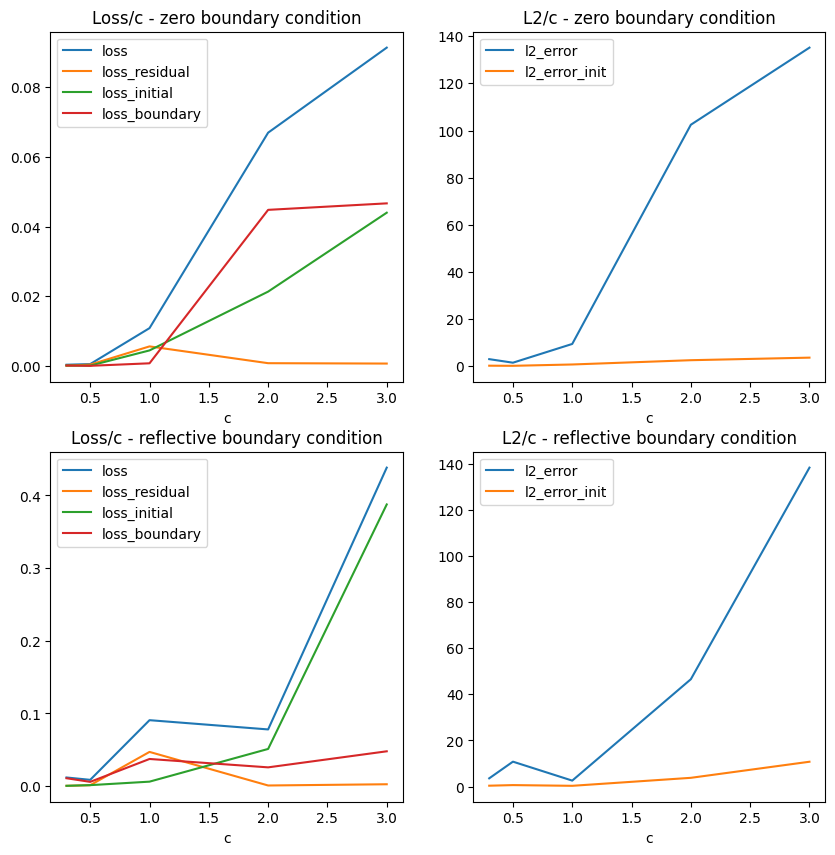

In [90]:
res_df = df[
    (df["a"] == 1) &
    (df["phi"] == 4) &
    (df["boundary_condition"] == 'zero')
    ]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

res_df.plot(x = 'c', y = 'loss', ax=axes[0][0])
res_df.plot(x = 'c', y = 'loss_residual', ax=axes[0][0])
res_df.plot(x = 'c', y = 'loss_initial', ax=axes[0][0])
res_df.plot(x = 'c', y = 'loss_boundary', ax=axes[0][0])
axes[0][0].set_title("Loss/c - zero boundary condition")

res_df.plot(x = 'c', y = 'l2_error', ax=axes[0][1])
res_df.plot(x = 'c', y = 'l2_error_init', ax=axes[0][1])
axes[0][1].set_title("L2/c - zero boundary condition")

res_df = df[
    (df["a"] == 1) &
    (df["phi"] == 4) &
    (df["boundary_condition"] == 'reflective')
    ]
    
res_df.plot(x = 'c', y = 'loss', ax=axes[1][0])
res_df.plot(x = 'c', y = 'loss_residual', ax=axes[1][0])
res_df.plot(x = 'c', y = 'loss_initial', ax=axes[1][0])
res_df.plot(x = 'c', y = 'loss_boundary', ax=axes[1][0])
axes[1][0].set_title("Loss/c - reflective boundary condition")

res_df.plot(x = 'c', y = 'l2_error', ax=axes[1][1])
res_df.plot(x = 'c', y = 'l2_error_init', ax=axes[1][1])
axes[1][1].set_title("L2/c - reflective boundary condition")

plt.show()

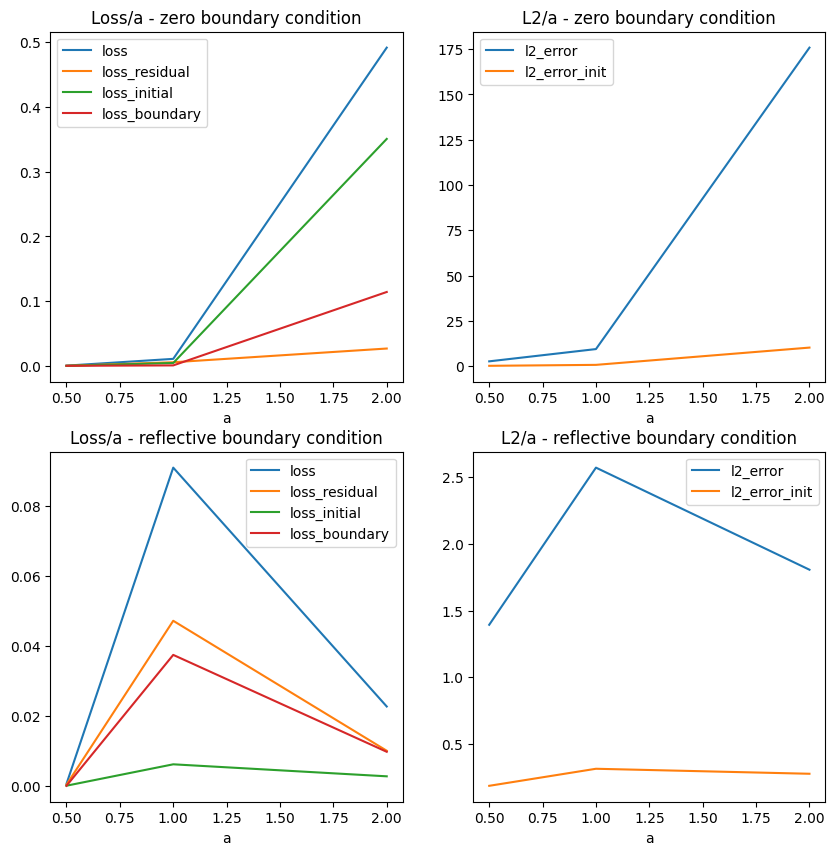

In [91]:
res_df = df[
    (df["c"] == 1) &
    (df["phi"] == 4) &
    (df["boundary_condition"] == 'zero')
    ]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

res_df.plot(x = 'a', y = 'loss', ax=axes[0][0])
res_df.plot(x = 'a', y = 'loss_residual', ax=axes[0][0])
res_df.plot(x = 'a', y = 'loss_initial', ax=axes[0][0])
res_df.plot(x = 'a', y = 'loss_boundary', ax=axes[0][0])
axes[0][0].set_title("Loss/a - zero boundary condition")

res_df.plot(x = 'a', y = 'l2_error', ax=axes[0][1])
res_df.plot(x = 'a', y = 'l2_error_init', ax=axes[0][1])
axes[0][1].set_title("L2/a - zero boundary condition")

res_df = df[
    (df["c"] == 1) &
    (df["phi"] == 4) &
    (df["boundary_condition"] == 'reflective')
    ]
    
res_df.plot(x = 'a', y = 'loss', ax=axes[1][0])
res_df.plot(x = 'a', y = 'loss_residual', ax=axes[1][0])
res_df.plot(x = 'a', y = 'loss_initial', ax=axes[1][0])
res_df.plot(x = 'a', y = 'loss_boundary', ax=axes[1][0])
axes[1][0].set_title("Loss/a - reflective boundary condition")

res_df.plot(x = 'a', y = 'l2_error', ax=axes[1][1])
res_df.plot(x = 'a', y = 'l2_error_init', ax=axes[1][1])
axes[1][1].set_title("L2/a - reflective boundary condition")

plt.show()

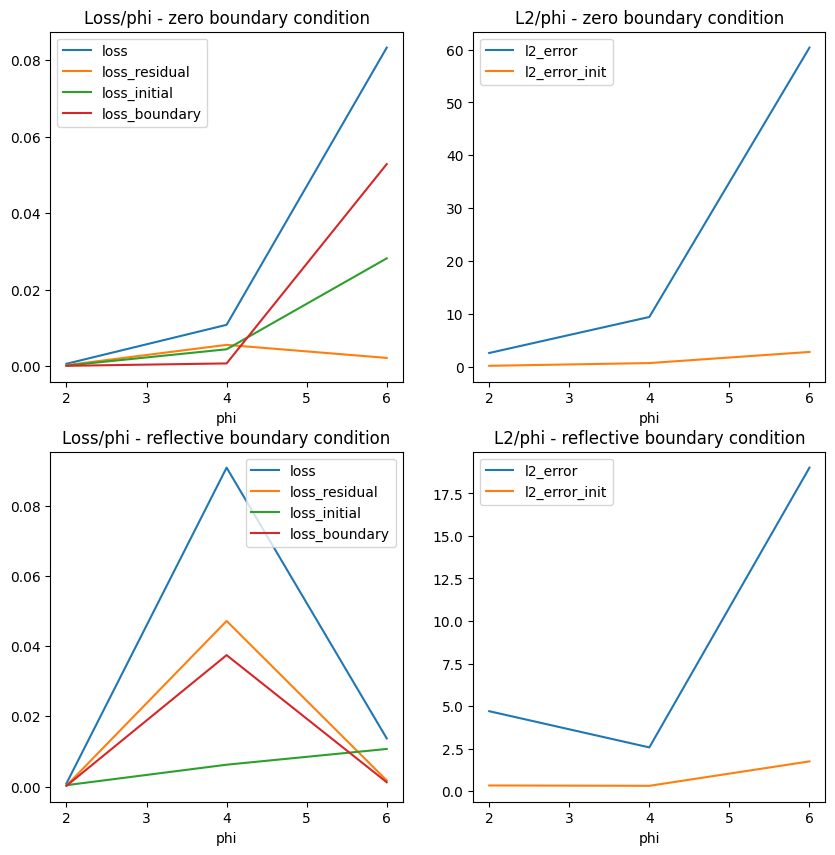

In [92]:
res_df = df[
    (df["c"] == 1) &
    (df["a"] == 1) &
    (df["boundary_condition"] == 'zero')
    ]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

res_df.plot(x = 'phi', y = 'loss', ax=axes[0][0])
res_df.plot(x = 'phi', y = 'loss_residual', ax=axes[0][0])
res_df.plot(x = 'phi', y = 'loss_initial', ax=axes[0][0])
res_df.plot(x = 'phi', y = 'loss_boundary', ax=axes[0][0])
axes[0][0].set_title("Loss/phi - zero boundary condition")

res_df.plot(x = 'phi', y = 'l2_error', ax=axes[0][1])
res_df.plot(x = 'phi', y = 'l2_error_init', ax=axes[0][1])
axes[0][1].set_title("L2/phi - zero boundary condition")

res_df = df[
    (df["c"] == 1) &
    (df["a"] == 1) &
    (df["boundary_condition"] == 'reflective')
    ]
    
res_df.plot(x = 'phi', y = 'loss', ax=axes[1][0])
res_df.plot(x = 'phi', y = 'loss_residual', ax=axes[1][0])
res_df.plot(x = 'phi', y = 'loss_initial', ax=axes[1][0])
res_df.plot(x = 'phi', y = 'loss_boundary', ax=axes[1][0])
axes[1][0].set_title("Loss/phi - reflective boundary condition")

res_df.plot(x = 'phi', y = 'l2_error', ax=axes[1][1])
res_df.plot(x = 'phi', y = 'l2_error_init', ax=axes[1][1])
axes[1][1].set_title("L2/phi - reflective boundary condition")

plt.show()

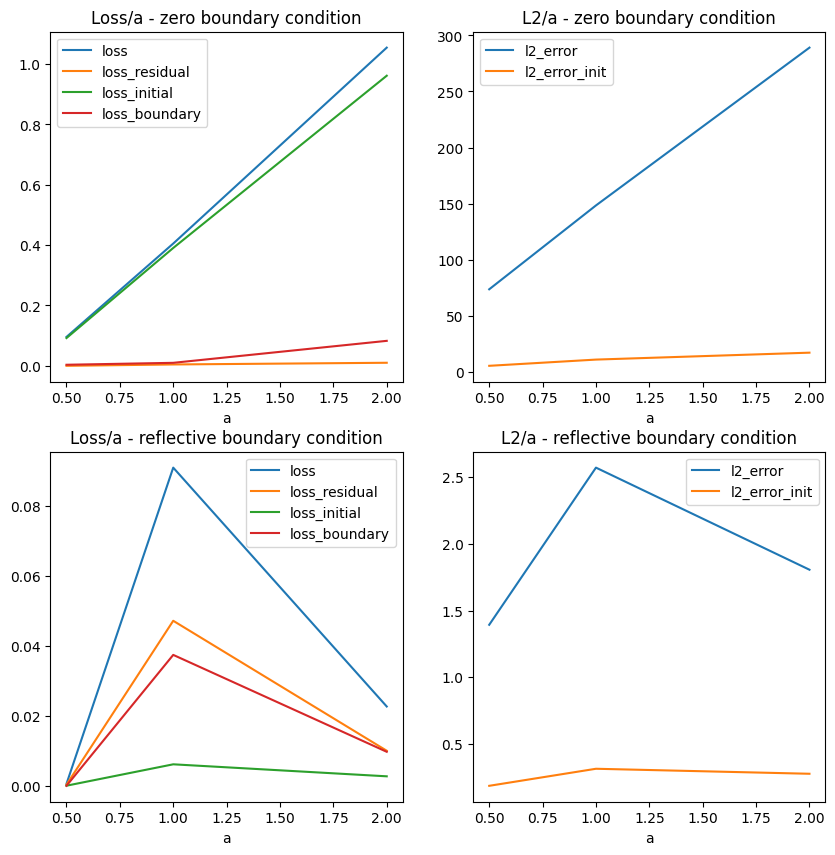

In [93]:
res_df = df[
    (df["c"] == 3) &
    (df["phi"] == 6) &
    (df["boundary_condition"] == 'zero')
    ]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

res_df.plot(x = 'a', y = 'loss', ax=axes[0][0])
res_df.plot(x = 'a', y = 'loss_residual', ax=axes[0][0])
res_df.plot(x = 'a', y = 'loss_initial', ax=axes[0][0])
res_df.plot(x = 'a', y = 'loss_boundary', ax=axes[0][0])
axes[0][0].set_title("Loss/a - zero boundary condition")

res_df.plot(x = 'a', y = 'l2_error', ax=axes[0][1])
res_df.plot(x = 'a', y = 'l2_error_init', ax=axes[0][1])
axes[0][1].set_title("L2/a - zero boundary condition")

res_df = df[
    (df["c"] == 1) &
    (df["phi"] == 4) &
    (df["boundary_condition"] == 'reflective')
    ]
    
res_df.plot(x = 'a', y = 'loss', ax=axes[1][0])
res_df.plot(x = 'a', y = 'loss_residual', ax=axes[1][0])
res_df.plot(x = 'a', y = 'loss_initial', ax=axes[1][0])
res_df.plot(x = 'a', y = 'loss_boundary', ax=axes[1][0])
axes[1][0].set_title("Loss/a - reflective boundary condition")

res_df.plot(x = 'a', y = 'l2_error', ax=axes[1][1])
res_df.plot(x = 'a', y = 'l2_error_init', ax=axes[1][1])
axes[1][1].set_title("L2/a - reflective boundary condition")

plt.show()